#### Task 1
* Integrate information from the “job_url_data” folder into one dictionary. The keys of the dictionary are individual urls scraped from the website, and the values are the earliest date that the corresponding urls were scraped. Save the results into a json file. How many unique job urls have been collected between May 17, 2022 and May 23, 2022?

In [6]:
import os
import glob
import csv
import pandas as pd
import json

os.chdir('/Users/[editted]/Desktop/compsoc/data/indeed_scraped_data/job_url_data')

#generate an output csv file to save the "merged" dataframe
with open('output.csv', 'w', newline='') as f_output:
    csv_output = csv.writer(f_output)  #create an output.csv that stores all job urls
    for file_name in glob.glob('*.csv'):
        if len(file_name) > 10:  #make sure that the output.csv (which length is 10) does not go into the loop
            with open(file_name, newline='') as f_input:
                csv_input = csv.reader(f_input)
                for row in csv_input:
                    row.insert(0, file_name[22:29])  #insert every row from the files plus the date (from file name) in output.csv
                    csv_output.writerow(row)

#drop the headers that were merged in the dataframe
all_url = pd.read_csv('output.csv', low_memory=False, header=None)  #eliminate the header
all_url = all_url[all_url[1].str.contains('job_url') == False]  #drop original header lines from each csv file
print(all_url.shape) #60981

#clean the data, and save them into a dictionary, and then convert into json file
all_url = all_url.groupby(1, as_index=False).min()  #drop duplicates, keep with the minimum value of 'date'
all_url.set_index(1,inplace=True) #eliminate index column
output_dict = all_url.to_dict()[0]
#output_dict
print(len(output_dict))


with open ('output.json','w') as g:
    json.dump(output_dict,g)

(60981, 2)
21260


**Task 1 Conclusion**
* There are 21260 unique job urls collected between May 17, 2022 and May 23, 2022.

In [7]:
#In addition, proof that the "all_url" that I generated corresponds with the actual line counts
import os
import pandas as pd

os.chdir('/Users/heather/Desktop/compsoc/data/indeed_scraped_data/job_url_data')

length = 0
for file_name in os.listdir(os.getcwd()):
    with open(os.path.join(os.getcwd(),file_name),'r') as f:
        if ("csv" in file_name) and (len(file_name)>10):
            read_file = pd.read_csv(file_name)
            length += len(read_file)
print (length)

60981


#### Task 2
* Clean and integrate information from the “job_info_data” folder into one data frame. Files from this subfolder might have two different formats. Some of them are csv files, while others are json files. The columns might also be named differently. Find ways to read each of the files into pandas, drop records with missing job titles and/or missing job descriptions, and combine them into one dataframe. Lastly, drop records with duplicate job urls, and then save them into a separate csv file. How many unique jobs are there in the cleaned dataframe?

In [8]:
import os
import pandas as pd
import glob
import csv

os.chdir('/Users/heather/Desktop/compsoc/data/indeed_scraped_data/job_info_data')

#convert the two json files into csv files
json_1 = pd.read_json('parsehub_5182022_v2.json')
df_1 = pd.DataFrame.from_dict(json_1) #convert the json file into csv, and found that there are lists under the column
df_1 = df_1['lnks'].apply(pd.Series) #extract the list and save them as new columns
#df_1
#df_1.to_csv('parsehub_5182022_v2.csv', index=False) #conver the dictionary into csv
json_2 = pd.read_json('parsehub_5202022_v2.json')
df_2 = pd.DataFrame.from_dict(json_2)
df_2 = df_2['lnks'].apply(pd.Series)
#df_2
df_2.to_csv('parsehub_5202022_v2.csv', index=False)

#generate an output csv file to save the "merged" dataframe
with open('output.csv', 'w', newline='') as f_output:
    csv_output = csv.writer(f_output)  #create an output.csv that "merge" all infos together
    for file_name in glob.glob('*.csv'):
         if len(file_name) > 10:  #make sure that the output.csv does not go into the loop
             with open(file_name, newline='') as f_input:
                 csv_input = csv.reader(f_input)
                 for row in csv_input:
                     row.insert(0, file_name[9:16])  #insert every row from the files plus the date together in output.csv
                     csv_output.writerow(row)

#drop the headers that were merged in the dataframe
all_info = pd.read_csv('output.csv', low_memory=False)
drop_value1 = all_info[all_info['lnks_link']=='lnks_link'].index
drop_value2 = all_info[all_info['lnks_job_title']=='job_title'].index
all_info.drop(drop_value1, inplace=True)
all_info.drop(drop_value2, inplace=True)
print(all_info.shape) #43877

#start cleaning data, dropping missing job titles and/or missing job descriptions, and duplicate job urls
cleaned_data = all_info.dropna(subset=['lnks_job_title', 'lnks_job_description'])
cleaned_data = cleaned_data.drop_duplicates(subset=['lnks_link'])
print(cleaned_data.shape)

(43877, 7)
(15907, 7)
(43877, 7)
(15907, 7)


**Task 2 Conclusion**
* There are 15907 unique jobs in the cleaned dataframe.

In [9]:
#In addition, proof that the "all_info" that I generated corresponds with the actual line counts
import os
import pandas as pd

os.chdir('/Users/heather/Desktop/compsoc/data/indeed_scraped_data/job_info_data')

length = 0
for file_name in os.listdir(os.getcwd()):
    with open(os.path.join(os.getcwd(),file_name),'r') as f:
        if ("csv" in file_name) and (len(file_name)>10):
            read_file = pd.read_csv(file_name)
            length += len(read_file)
print (length)

43877
43877


#### Task 3
* Merge between “job_url_data” and “job_info_data”. What is the percentage of jobs that can be matched between these two data sources? How are the missing data (unmatched job urls) distributed by date? What about matched job urls? How many complete job listings were we able to collect each day? How would you interpret this result with respect to data quality? Does it mean that our data collection strategy is flawed and thus introduces non-random sampling biases?

The total number of unique job urls collected is:  21260
The total number of unique job infos collected is:  15907
Total number of matched jobs is:  15907
    date_x  count
0  5172022   3894
1  5182022   1321
2  5192022   3721
3  5202022   4480
4  5212022   1932
5  5222022    559


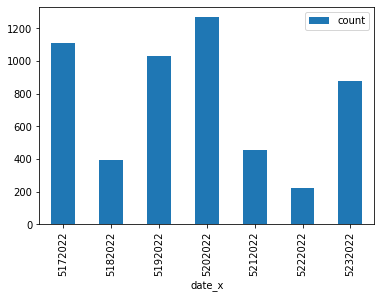

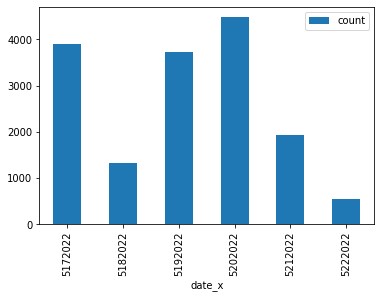

The total number of unique job urls collected is:  21260
The total number of unique job infos collected is:  15907
Total number of matched jobs is:  15907
    date_x  count
0  5172022   3894
1  5182022   1321
2  5192022   3721
3  5202022   4480
4  5212022   1932
5  5222022    559


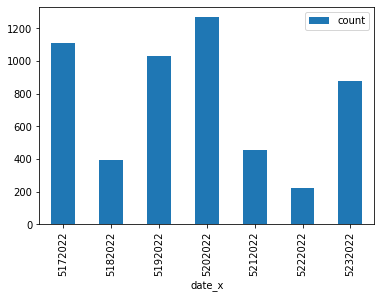

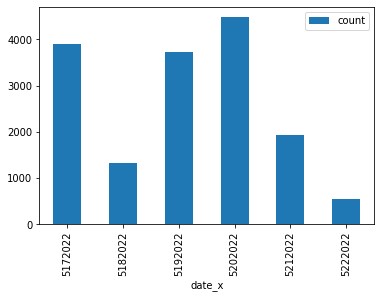

In [10]:
import os
import pandas as pd

#repeat url data cleaning procedure (drop duplicates and keep unique urls with earlier dates)
os.chdir('/Users/heather/Desktop/compsoc/data/indeed_scraped_data/job_url_data')
job_url = pd.read_csv('output.csv', low_memory=False)
job_url = job_url.rename(columns={'5212022': 'date'})
job_url = job_url[job_url['job_url'].str.contains('job_url') == False]
job_url = job_url.groupby('job_url', as_index=False).min()
print('The total number of unique job urls collected is: ', len(job_url)) #make sure that the shape corresponds with what's generated from task1

#repeat info data cleaning procedure (drop duplicates and keep unique links)
os.chdir('/Users/heather/Desktop/compsoc/data/indeed_scraped_data/job_info_data')
job_info = pd.read_csv('output.csv', low_memory=False)
job_info = job_info.rename(columns={'5222022': 'date'})
drop_value1 = job_info[job_info['lnks_link']=='lnks_link'].index
drop_value2 = job_info[job_info['lnks_job_title']=='job_title'].index
job_info.drop(drop_value1, inplace=True)
job_info.drop(drop_value2, inplace=True)
job_info = job_info.dropna(subset=['lnks_job_title', 'lnks_job_description'])
job_info = job_info.drop_duplicates(subset=['lnks_link'])
print('The total number of unique job infos collected is: ', len(job_info)) #make sure that the shape corresponds with what's generated from task2

#merge the two dataframes together, get the matched and unmatched portions
all = job_url.merge(job_info, how='outer', left_on=['job_url'], right_on=['lnks_link']) #all urls and links with no duplicates using outer merge
#print(all.shape)
matched = job_url.merge(job_info, how='inner', left_on=['job_url'], right_on=['lnks_link']) #matched urls and links with inner merge
print('Total number of matched jobs is: ', len(matched))
inner_merge_index = matched.index #get the indexes of the matched datas
unmatched = all.drop(list(inner_merge_index)) #drop the matched portion from all to get the unmatched portion
unmatched_date = unmatched.groupby(['date_x']).size().reset_index(name='count') #get the date distribution (count) of unmatched data
unmatched_date.plot.bar(x='date_x', y='count') #plot the distribution
matched_date = matched.groupby(['date_x']).size().reset_index(name='count') #get the date distribution (count) of matched data
matched_date.plot.bar(x='date_x', y='count') #plot the distribution
print(matched_date)

**Task 3 Conclusion**
* 15907/21260=0.74821, approximately 74.82 percent of jobs can be matched between the two data sources.
* All dates have missing data. Most of the missing data appear to be on 5.20, then on 5.17, 5.19, 5.23, and then far less on 5.21, 5.18, and the least on 5.22.
* There are matched jobs everday except on 5.23. The most matched jobs are on 5.20, and then on 5.17 and 5.19; less on 5.21 and 5.18, and with the least on 5.22.
* As shown in the dataframe printed above, there were 3894 complete job listings on 5.17, 1321 on 5.18, 3721 on 5.19, 4480 on 5.20, 1932 on 5.21, 559 on 5.22, and none on 5.23.
* Based on the results, I think the data quality is not too bad. Because the unmatched and matched data almost distribute on every single day of the data collection.